In [ ]:
#Import modul
import numpy as np
import pandas as pd
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#baca data
df = pd.read_csv('customer_behaviour.csv')
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [ ]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [ ]:
df['City'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Miami',
       'Houston'], dtype=object)

In [ ]:
df['Membership Type'].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [ ]:
df['Average Rating'].unique()

array([4.6, 4.1, 3.4, 4.7, 4. , 3.1, 4.5, 4.2, 3.6, 4.8, 3.8, 3.2, 4.3,
       4.4, 3.5, 4.9, 3.7, 3. , 3.3, 3.9])

In [ ]:
df['Discount Applied'].unique()

array([ True, False])

In [ ]:
df['Satisfaction Level'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Customer ID'].duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [ ]:
#Mengisi nilai kosong pada Satisfaction Level dengan Modus
modus_value = df['Satisfaction Level'].mode()[0]  # Mengambil nilai modus
df['Satisfaction Level'].fillna(modus_value, inplace=True)  # Mengisi nilai kosong dengan modus

In [ ]:
df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [ ]:
df['Spend per Item'] = df['Total Spend'] / df['Items Purchased']
# Untuk lebih mengetahui lebih baik
# hubungan antara variabel independen dan kepuasan pelanggan,
#coba hitung Spend per Item dan menambahkannya sebagai kolom baru di dataframe

In [ ]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Spend per Item
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,80.014286
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,70.954545
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,56.750000
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,77.910526
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,55.415385


In [ ]:
#Download file bersihnya (non encoding) untuk Looker
from google.colab import files
df.to_csv('cleaned_customerbehaviour.csv', index=False)
files.download('cleaned_customerbehaviour.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Initialize LabelEncoders
le_gender = LabelEncoder()
le_membership = LabelEncoder()
le_discount = LabelEncoder()
le_satisfaction = LabelEncoder()

# Encode the columns
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Membership Type'] = le_membership.fit_transform(df['Membership Type'])
df['Discount Applied'] = le_discount.fit_transform(df['Discount Applied'])
df['Satisfaction Level'] = le_satisfaction.fit_transform(df['Satisfaction Level'])

In [ ]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Spend per Item
0,101,0,29,New York,1,1120.20,14,4.6,1,25,1,80.014286
1,102,1,34,Los Angeles,2,780.50,11,4.1,0,18,0,70.954545
2,103,0,43,Chicago,0,510.75,9,3.4,1,42,2,56.750000
3,104,1,30,San Francisco,1,1480.30,19,4.7,0,12,1,77.910526
4,105,1,27,Miami,2,720.40,13,4.0,1,55,2,55.415385


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    int64  
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    int64  
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    int64  
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        350 non-null    int64  
 11  Spend per Item            350 non-null    float64
dtypes: float64(3), int64(8), object(1)
memory usage: 32.9+ KB


In [ ]:
#Download file bersihnya (encoding)
from google.colab import files
df.to_csv('cleanedencode_customerbehaviour.csv', index=False)
files.download('cleanedencode_customerbehaviour.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Uji Normalitas, Detect Outlier, Delete Ooutlier

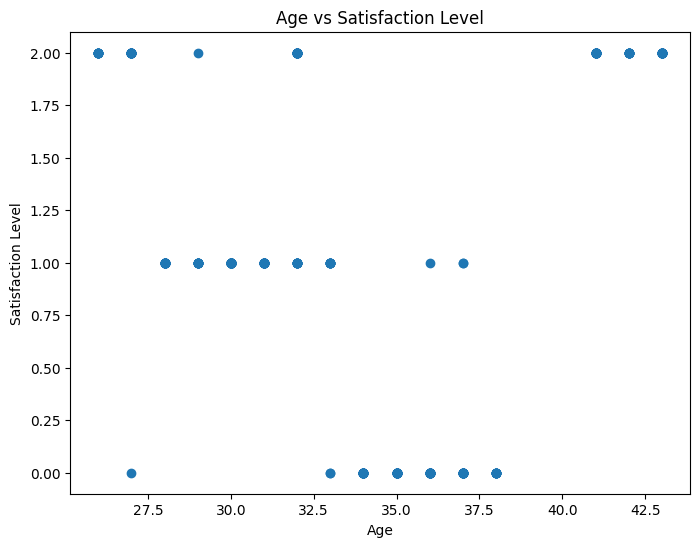

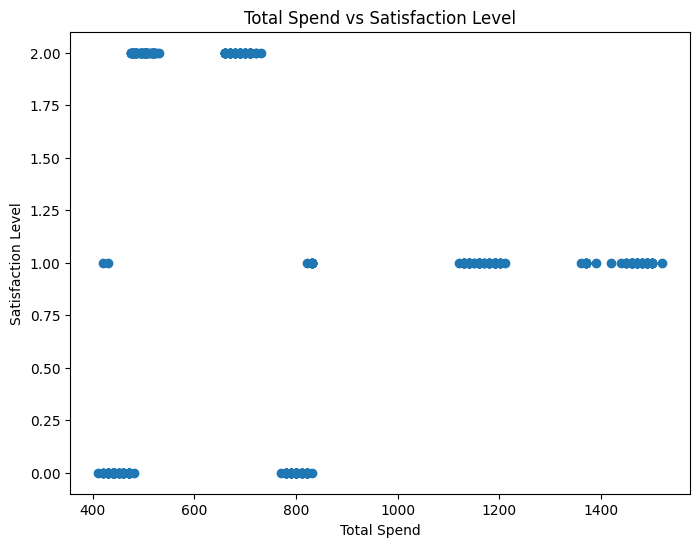

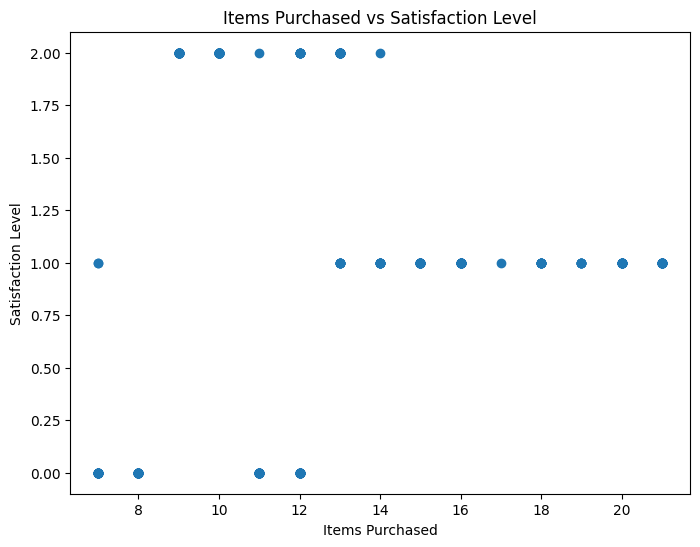

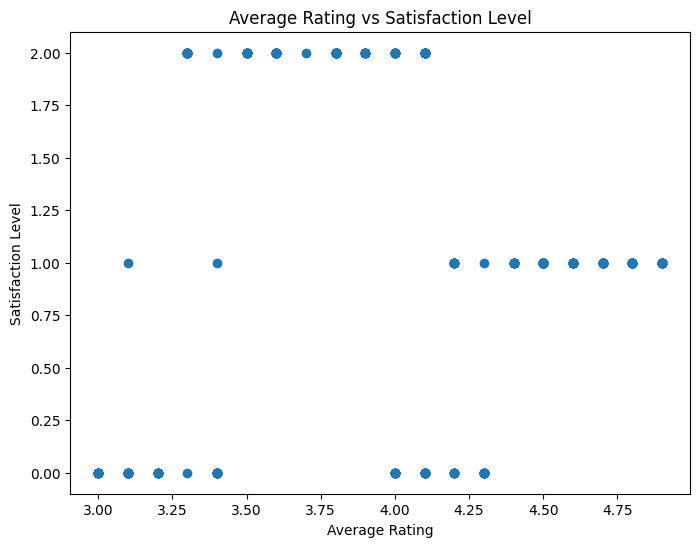

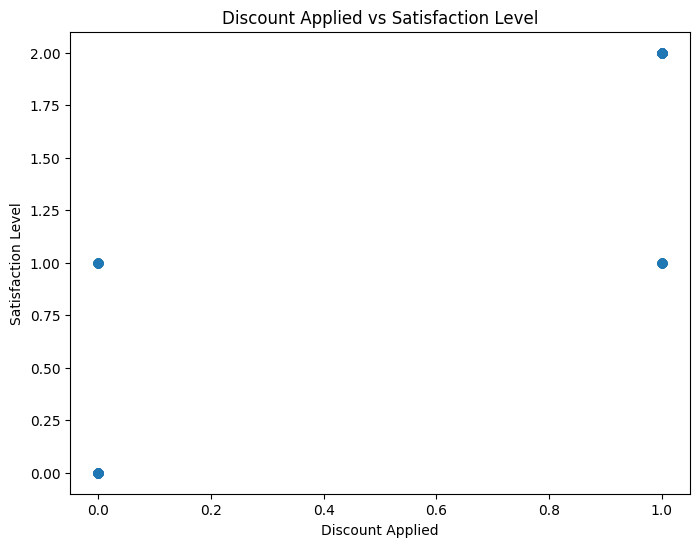

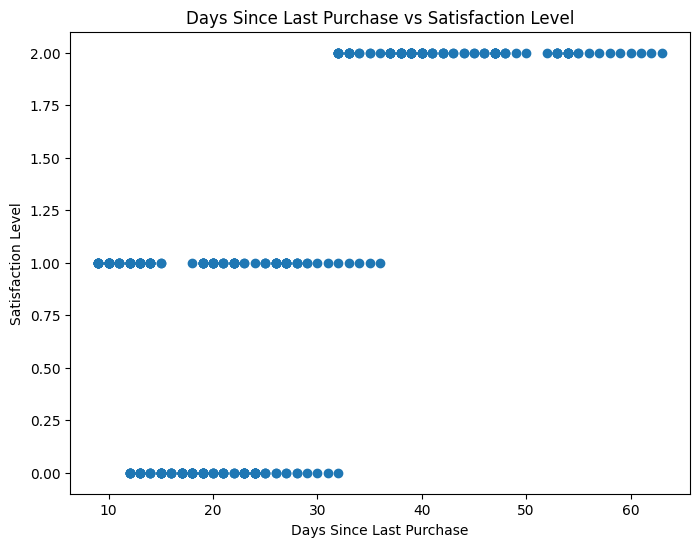

In [ ]:
import matplotlib.pyplot as plt

# Misal data kamu ada di dataframe df
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase']

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Satisfaction Level'])
    plt.title(f'{feature} vs Satisfaction Level')
    plt.xlabel(feature)
    plt.ylabel('Satisfaction Level')
    plt.show()

#Distribusi data tidak normal, maka akan menggunakan model Logistic Regression, Decision Tree, atau Random Forest.
#tetap hapus dulu outliernya

<Axes: ylabel='Age'>

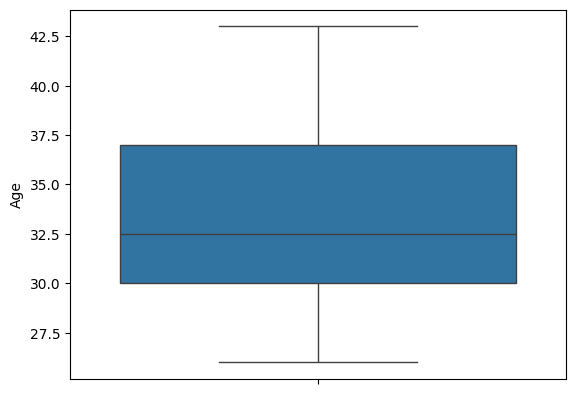

In [ ]:
#Age
sns.boxplot(df['Age'])
#bagus, tidak ada outlier

<Axes: ylabel='Total Spend'>

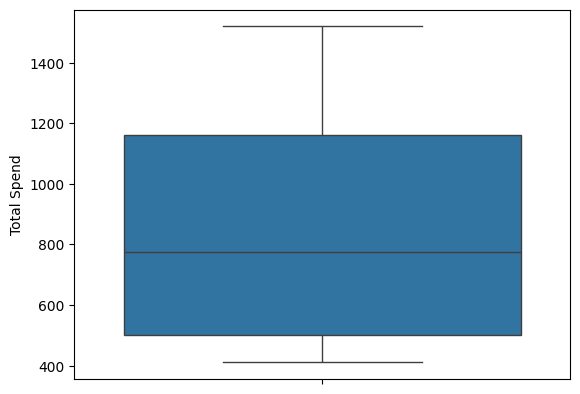

In [ ]:
sns.boxplot(df['Total Spend'])
#bagus juga

<Axes: ylabel='Items Purchased'>

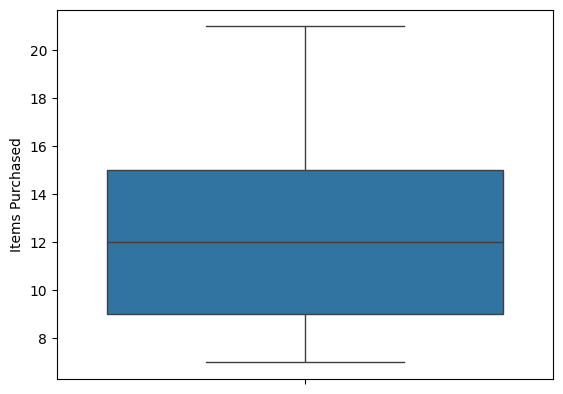

In [ ]:
sns.boxplot(df['Items Purchased'])
#bagus

<Axes: ylabel='Average Rating'>

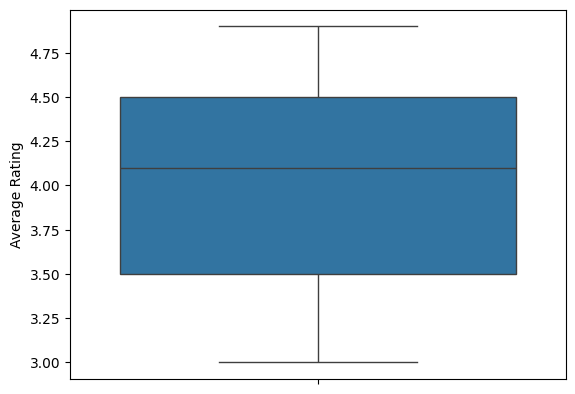

In [ ]:
sns.boxplot(df['Average Rating'])
#bagus

<Axes: ylabel='Discount Applied'>

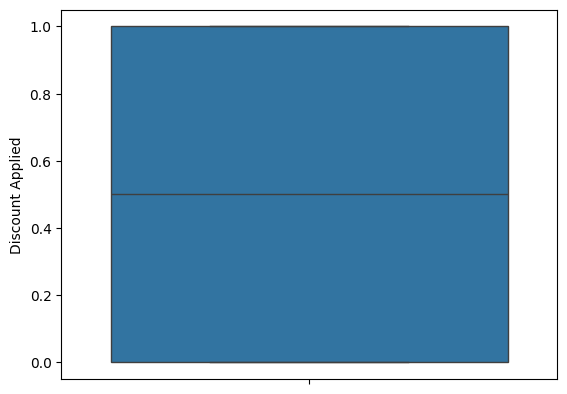

In [ ]:
sns.boxplot(df['Discount Applied'])

<Axes: ylabel='Days Since Last Purchase'>

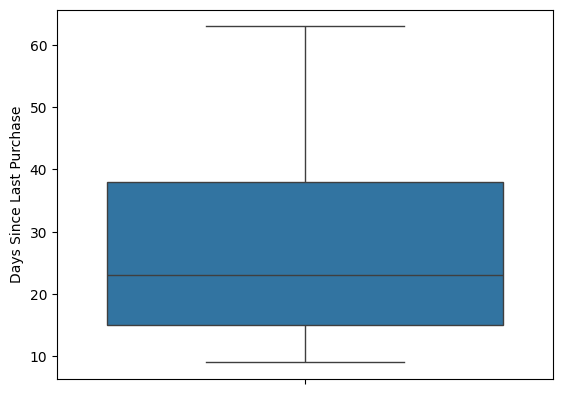

In [ ]:
sns.boxplot(df['Days Since Last Purchase'])

# Berhubung data tidak berdistribusi normal, kita coba pakai model Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    int64  
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    int64  
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    int64  
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        350 non-null    int64  
 11  Spend per Item            350 non-null    float64
dtypes: float64(3), int64(8), object(1)
memory usage: 32.9+ KB


In [ ]:
#input fitur
X = df[['Age', 'Items Purchased', 'Spend per Item', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase']]
y = df['Satisfaction Level']

In [ ]:
# Training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(280, 6) (280,) (70, 6) (70,)


In [ ]:
# Membuat model Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)

In [ ]:
# Melatih model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
X_test #ini buat apaan ya? wkwk

,Age,Items Purchased,Spend per Item,Average Rating,Discount Applied,Days Since Last Purchase
157,35,12,67.575000,4.3,0,13
341,31,15,76.040000,4.5,1,36
315,27,13,54.646154,4.1,1,61
234,33,13,63.903846,4.2,0,14
155,37,7,61.542857,3.4,0,23
...,...,...,...,...,...,...
94,26,12,57.550000,3.9,1,47
181,34,11,71.836364,4.0,0,15
179,36,8,58.812500,3.0,0,18
199,34,11,72.745455,4.1,0,17


In [ ]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
#alhamdulillaah warbiyasah madagaskar

Mean Squared Error: 0.0017285532351167968
R^2 Score: 0.9970228784351239


In [ ]:
# Assuming 'model' is your trained RandomForestRegressor
example = [[35, 4, 11200, 4, 0, 15]]
satisfaction_level = model.predict(example)

# Convert the predicted value to an integer between 0 and 2
predicted_class = int(round(satisfaction_level[0]))

# Ensure the predicted class is within the valid range
predicted_class = max(0, min(predicted_class, 2))

print(f'Predicted Satisfaction Level Class: {predicted_class}')

Predicted Satisfaction Level Class: 0


In [ ]:
# Assuming 'model' is your trained RandomForestRegressor
example = [[35, 4, 11200, 4, 0, 15]]
satisfaction_level = model.predict(example)

# Convert the predicted value to an integer between 0 and 2
predicted_class = int(round(satisfaction_level[0]))

# Ensure the predicted class is within the valid range
predicted_class = max(0, min(predicted_class, 2))

# Map the predicted class to the corresponding label
satisfaction_labels = ["Unsatisfied", "Neutral", "Satisfied"]
predicted_label = satisfaction_labels[predicted_class]

print(f'Predicted Satisfaction Level: {predicted_label}')

Predicted Satisfaction Level: Unsatisfied


# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Assuming X and y are already defined as in your notebook
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9857142857142858


In [ ]:
# Assuming 'model' is your trained LogisticRegression model and X_test is your test data
y_pred = model.predict(X_test)

# Print the predicted satisfaction levels
print(y_pred)

[0 2 2 1 0 0 0 1 1 0 1 2 1 1 0 1 2 0 2 2 1 1 2 1 2 0 0 1 1 1 0 1 2 0 0 0 1
 1 0 2 0 1 2 0 2 2 1 0 0 1 1 1 1 0 0 2 2 1 1 1 2 1 1 2 2 2 0 0 0 1]


In [ ]:
example = [[28, 3, 26000, 3, 1, 10]]
satisfaction_level = model.predict(example)

# Convert the predicted value to an integer between 0 and 2
predicted_class = int(round(satisfaction_level[0]))

# Ensure the predicted class is within the valid range
predicted_class = max(0, min(predicted_class, 2))

# Map the predicted class to the corresponding label
satisfaction_labels = ["Unsatisfied", "Neutral", "Satisfied"]
predicted_label = satisfaction_labels[predicted_class]

print(f'Predicted Satisfaction Level: {predicted_label}')

Predicted Satisfaction Level: Unsatisfied


# Model Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Assuming X_train and y_train are already defined
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)  # Assuming X_test is your test data

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Misalnya, X_train dan y_train sudah siap
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Simpan model
joblib.dump(model, 'random_forest_model.pkl')

pip install streamlit

import streamlit as st
import joblib
import pandas as pd

# Load model
model = joblib.load('random_forest_model.pkl')

# Judul Aplikasi
st.title('Prediksi Analisis dengan Random Forest')

# Input pengguna
def get_user_input():
    feature1 = st.text_input('Masukkan nilai fitur 1:')
    feature2 = st.text_input('Masukkan nilai fitur 2:')
    # Tambahkan fitur lain sesuai kebutuhan

    data = {'feature1': feature1,
            'feature2': feature2}

    features = pd.DataFrame(data, index=[0])
    return features

user_input = get_user_input()

# Tampilkan input pengguna
st.write('Input pengguna:')
st.write(user_input)

# Prediksi
prediction = model.predict(user_input)
st.write('Hasil Prediksi:')
st.write(prediction)

streamlit run app.py

pip install streamlit




SyntaxError: invalid syntax (<ipython-input-52-be92bdab5d3c>, line 11)